<a href="https://colab.research.google.com/github/soymlk94/datavis_sp24/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#HPV CODE

#The reason for chosing this data is because of the research I am doing for my lab(dissertation), I work in the Piccolo
#lab where I will be creating a mathematical model of HPV in the state of New Jersey , in relation of HPV cancer
#vaccine presence , these stats are general of the United States , measures the type of HPV, race , and prevelance

In [3]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

In [4]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [5]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  hpv_infection_data_structured.csv  sample_data


In [6]:
dat=pd.read_csv('hpv_infection_data_structured.csv') #read it in  ; or full path: '/content/ex1.csv'

In [7]:
dat.columns #list var names

Index(['HPV Type', 'Race', 'Sex', 'Prevalence (%)', 'Notes'], dtype='object')

In [8]:
dat.head(2)
dat.tail(2)

,HPV Type,Race,Sex,Prevalence (%),Notes
0,Oral HPV,All,Overall,7.3,Among adults aged 18–69
1,Oral HPV,All,Men,11.5,Higher prevalence in men


,HPV Type,Race,Sex,Prevalence (%),Notes
17,High-risk Oral HPV,Non-Hispanic Black,All,4.3,Highest prevalence
18,Genital HPV,Non-Hispanic Black Males,All,Higher,Higher prevalence compared to other groups


In [9]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,HPV Type,Race,Sex,Prevalence (%),Notes
0,Oral HPV,All,Overall,7.3,Among adults aged 18–69
1,Oral HPV,All,Men,11.5,Higher prevalence in men
2,Oral HPV,All,Women,3.3,Lower prevalence in women
3,High-risk Oral HPV,All,Overall,4.0,Among adults aged 18–69
4,High-risk Oral HPV,All,Men,6.8,Higher prevalence in men
5,High-risk Oral HPV,All,Women,1.2,Lower prevalence in women
6,Genital HPV,All,Overall,42.5,Among adults aged 18–59
7,Genital HPV,All,Men,45.2,Higher prevalence in men
8,Genital HPV,All,Women,39.9,Lower prevalence in women
9,High-risk Genital HPV,All,Overall,22.7,Among adults aged 18–59


In [10]:
dat["HPV Type"][0:3] #subset or slice

,HPV Type
0,Oral HPV
1,Oral HPV
2,Oral HPV


<Axes: >

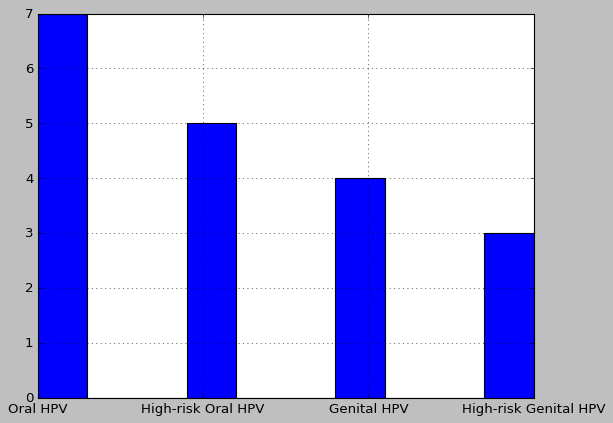

In [11]:
dat["HPV Type"].hist() #again, always interpret all output

<Axes: xlabel='Prevalence (%)', ylabel='HPV Type'>

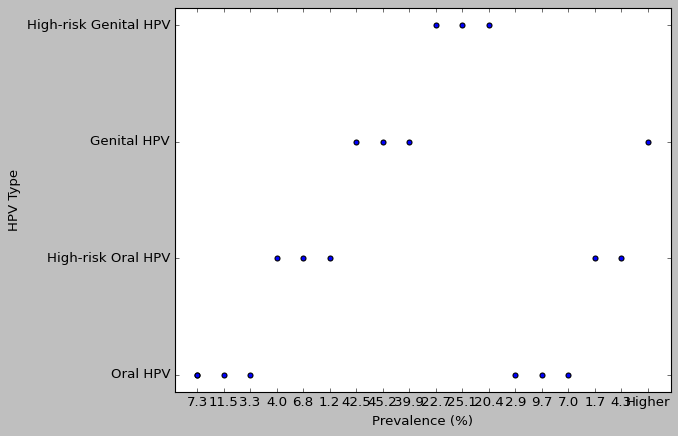

In [16]:
dat.plot(kind='scatter', y='HPV Type', x='Prevalence (%)')